In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as pth
import seaborn as sns
from astropy.stats import RipleysKEstimator
from shapely.geometry import Polygon
import re
from itertools import compress
from itertools import chain
from collections import defaultdict
import os
pd.options.display.max_colwidth=300
pd.options.display.max_rows=300

In [2]:
# %load /home/balla-gyula/Mint_Documents/Scripts/chooselines.py
'''
Takes a text file and  returns the text it contains except the specified number of lines in the beginning.
For eg. with storm roiattr files we can cut off the lines not containing roi coordinates: chooselines
(chooseline('path/to/file/roiattr.txt', 11)
'''
def chooselines(path, n=11): # takes the path to file and the number of lines to cut off from the beginning
    with open(path, 'r')as f:
        line_offset= []
        offset=0
        for line in f:
            line_offset.append(offset)
            offset+=len(line)+1
        f.seek(0)
        f.seek(line_offset[n])
        fname=os.path.splitext(path)[0]
        newfile=str(fname + '_COORD.txt')
        with open(newfile, 'w') as wf:
            wf.write('x\ty\n')
            aa=f.read()
            wf.write(aa)
        rf=f.read()
        return(print(rf))



In [3]:
os.chdir('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi')

In [4]:
aa= !ls /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/*RoiAttr.txt
aa

['/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_01_4_extroi_freehandROI_3_RoiAttr.txt',
 '/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_02_13_extroi_freehandROI_5_RoiAttr.txt',
 '/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_02_16_extroi_freehandROI_7_RoiAttr.txt',
 '/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_03_19_extroi_freehandROI_9_RoiAttr.txt',
 '/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_03_24_extroi_freehandROI_11_RoiAttr.txt',
 '/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_03_01_27_extroi_freehandROI_17_RoiAttr.txt',
 '/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_03_02_34_extroi_freehandROI_19_RoiAttr.txt',
 '/m

In [99]:
for file in aa:
    chooselines(file, 11)

In [2]:
# RoiAttr files
roiattr_files= !ls /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/*COORD.txt
files=pd.DataFrame(data=roiattr_files, columns=['RoiAttr'])
files['index']=files['RoiAttr'].map(lambda x: x[90:101] +  re.search(r'\w*(_\d+)_extroi\w*.txt', x).group(1))
files.set_index('index', inplace=True)
# files.head()
#RoiCoord files
roicoord_files=! ls /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/*RoiCoords.txt
files_coord=pd.DataFrame(data=roicoord_files, columns=['RoiCoord'])
files_coord['index']=files_coord['RoiCoord'].map(lambda x: x[90:101] + re.search(r'\w*(_\d+)_extroi\w*.txt', x).group(1))
files_coord.set_index('index', inplace=True)
#defining groups
def group_id(Cell):
    if Cell=='BB185':
        return 'High'
    if Cell=='BB193':
        return 'High'
    if Cell=='BB192':
        return 'Ctrl'
    if Cell=='BB203':
        return 'Ctrl'
    if Cell == 'BB222':
        return 'Low'
    if Cell == 'BB226':
        return 'Low'
    if Cell == 'BB238':
        return 'Low'
    if Cell == 'BB239':
        return 'Low'
# # Unified, indexed table with RoiCoord and RoiAttr pathes with Cell and Group names included
files['RoiCoord']=files.index.map(files_coord['RoiCoord'])
files['Cell']=files.index.map(lambda x: x[:5])
files['Group']=files['Cell'].apply(lambda cell: group_id(cell))
files=files.dropna()
files.head()

RoiAttr  \
index                                                                                                                                                              
BB185_02_01_4     /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_01_4_extroi_freehandROI_3_RoiAttr_COORD.txt   
BB185_02_02_13   /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_02_13_extroi_freehandROI_5_RoiAttr_COORD.txt   
BB185_02_02_16   /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_02_16_extroi_freehandROI_7_RoiAttr_COORD.txt   
BB185_02_03_19   /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_03_19_extroi_freehandROI_9_RoiAttr_COORD.txt   
BB185_02_03_24  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_03_24_extroi_freehandROI_11_RoiAttr_COORD.txt   

                                                                                                                                                    RoiCoord  \
index                                                                                                                                                          
BB185_02_01_4     /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_01_4_extroi_freehandROI_3_RoiCoords.txt   
BB185_02_02_13   /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_02_13_extroi_freehandROI_5_RoiCoords.txt   
BB185_02_02_16   /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_02_16_extroi_freehandROI_7_RoiCoords.txt   
BB185_02_03_19   /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_03_19_extroi_freehandROI_9_RoiCoords.txt   
BB185_02_03_24  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_03_24_extroi_freehandROI_11_RoiCoords.txt   

                 Cell Group  
index                        
BB185_02_01_4   BB185  High  
BB185_02_02_13  BB185  High  
BB185_02_02_16  BB185  High  
BB185_02_03_19  BB185  High  
BB185_02_03_24  BB185  High

In [3]:
# files.to_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/GABA_files_list.csv', sep='\t')

In [9]:
count_bouton_ripley(path_roicoord='/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_01_4_extroi_freehandROI_3_RoiCoords.txt',
                    path_roiattr='/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_01_4_extroi_freehandROI_3_RoiAttr_COORD.txt')

/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_01_4_extroi_freehandROI_3_RoiCoords.txt
Number of real points: 959 
Number of generated points: 959
BB185_02_01_4 Done


{'Name': 'BB185_02_01_4',
 'Poisson': array([0.00000000e+00, 8.01344927e+01, 3.20537971e+02, 7.21210435e+02,
        1.28215188e+03, 2.00336232e+03, 2.88484174e+03, 3.92659014e+03,
        5.12860754e+03, 6.49089391e+03, 8.01344927e+03, 9.69627362e+03,
        1.15393670e+04, 1.35427293e+04, 1.57063606e+04, 1.80302609e+04,
        2.05144301e+04, 2.31588684e+04, 2.59635756e+04, 2.89285519e+04,
        3.20537971e+04, 3.53393113e+04, 3.87850945e+04, 4.23911467e+04,
        4.61574678e+04, 5.00840580e+04, 5.41709171e+04, 5.84180452e+04,
        6.28254423e+04, 6.73931084e+04, 7.21210435e+04, 7.70092475e+04,
        8.20577206e+04, 8.72664626e+04, 9.26354736e+04, 9.81647536e+04,
        1.03854303e+05, 1.09704121e+05, 1.15714208e+05, 1.21884563e+05,
        1.28215188e+05, 1.34706082e+05, 1.41357245e+05, 1.48168677e+05,
        1.55140378e+05, 1.62272348e+05, 1.69564587e+05, 1.77017094e+05,
        1.84629871e+05, 1.92402917e+05, 2.00336232e+05, 2.08429816e+05,
        2.16683668e+05, 2.2

In [4]:
hi=files[files['Group']=='High']
lo=files[files['Group']=='Low']
ct=files[files['Group']=='Ctrl']
hi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, BB185_02_01_4 to BB193_08_02_347
Data columns (total 4 columns):
RoiAttr     75 non-null object
RoiCoord    75 non-null object
Cell        75 non-null object
Group       75 non-null object
dtypes: object(4)
memory usage: 2.9+ KB


In [5]:
# defining RoiAttr Polygon
def polygon_area(path):
    '''
Reads a coordinate file and returns a  polygon.
Needs  shapely
'''
    df=pd.read_csv(path, sep='\t', header='infer')
    roizip=zip(df.x, df.y)
    roilist=list(roizip)
    polyarea=Polygon(roilist).area
    return polyarea

In [6]:
def count_bouton_ripley(path_roicoord, path_roiattr):
    '''
path_roicoord - path to the given bouton's roicoord files. Text file generated 
from vividstorm containing the interesting informations from the given storm 
localizations.
path_roiattr - path to the given bouton's roiattr files. Has to contain the x 
and y coordinates of the ROI only.

    '''
    coord=pd.read_csv(path_roicoord, header='infer', sep='\t')
    n=len(coord.loc[coord['Channel Name']=='405/647']) # number of LPs in the STORM stack
    xx=coord.loc[coord['Channel Name']=='405/647']['Xwc'] # x coordinates of LP
    yy=coord.loc[coord['Channel Name']=='405/647']['Ywc'] # y coordinate of LP
    real=list(zip(xx, yy))  # zipped x+y coords
    # real[:10]
    #reading in RoiAttr file
    attr01=pd.read_csv(path_roiattr, header='infer', sep='\t')
    vtx=list(zip(attr01['x'], attr01['y'])) # coordinates for RoiAttr polygon
    # plt.plot(attr01['x'], attr01['y']) # plots bouton polygon
    # bounding box coordinates of the polygons
    xlow=attr01.x.min()
    xhigh=attr01.x.max()
    ylow=attr01.y.min()
    yhigh=attr01.y.max()
    #generating n random points inside the bounding box
    zx=np.random.uniform(low=xlow, high=xhigh, size=n)
    zy=np.random.uniform(low=ylow, high=yhigh, size=n)
    zxy=list(zip(zx,zy))
    #print(len(zxy))
    contain=pth.Path(vtx).contains_points(zxy)
    filtered=list(compress(zxy, contain))
    ins=len(filtered)
    ins                   # number of points inside the polygon
    # generating n points inside the polygon
    while ins<n:
        zx1=np.random.uniform(low=xlow, high=xhigh, size=(n-ins))
        zy1=np.random.uniform(low=ylow, high=yhigh, size=(n-ins))
        zxy1=list(zip(zx1,zy1))
        zxy=zxy+zxy1
    #     print(zxy)/
        contain=pth.Path(vtx).contains_points(zxy)
        filtered=list(compress(zxy, contain))
        ins=len(filtered)
    print(path_roicoord)
    print(f'Number of real points: {n} \nNumber of generated points: {ins}')
    # prints real and generated LP number inside the polygon
    fx,fy=zip(*filtered)  # unzips generated uniform x and y coordinates
    # len(fy)
    
    fpath, fname = os.path.split(path_roicoord)
    code =  re.search(r'(BB\d{3}_\d{2}_\d{2}_\d{1,3})_.*_RoiCoords.txt', fname)
    idf = str(code.group(1))
    
    #plots the investigated bouton and the theoretical uniform distribution
    pr=polygon_area(path_roiattr)
    r=np.linspace(0,500,100)
    Kest=RipleysKEstimator(area=pr, x_min=xlow, x_max=xhigh, y_min=ylow, y_max=yhigh)

    poi=Kest.poisson(r)                                  # generates data for poisson pattern for the given bouton
    uni=Kest(data=filtered, radii=r, mode='ripley')      # generates data for a unique random pattern for the given bouton
    rl=Kest(data=real, radii=r, mode='ripley')           # generates data for the real pattern for the given bouton
    print(f'{idf} Done')
    return {'Name': idf, 'Poisson': poi, 'Uniform':uni, 'Real': rl}

In [10]:
xhi = list(hi['RoiAttr'])
yhi = list(hi['RoiCoord'])
xlo = list(lo['RoiAttr'])
ylo = list(lo['RoiCoord'])
xct = list(ct['RoiAttr'])
yct = list(ct['RoiCoord'])
len(xlo)

197

In [8]:
hizip=zip(xhi, yhi)
lozip=zip(xlo, ylo)
ctzip=zip(xct, yct)

In [9]:
high=[]
low=[]
ctrl=[]
for xhi, yhi in hizip:
    high.append(count_bouton_ripley(yhi, xhi))98547
for xlo, ylo in lozip:
    low.append(count_bouton_ripley(ylo, xlo))
for xct, yct in ctzip:
    ctrl.append(count_bouton_ripley(yct, xct))

/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_01_4_extroi_freehandROI_3_RoiCoords.txt
Number of real points: 959 
Number of generated points: 959
BB185_02_01_4 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_02_13_extroi_freehandROI_5_RoiCoords.txt
Number of real points: 1476 
Number of generated points: 1476
BB185_02_02_13 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_02_16_extroi_freehandROI_7_RoiCoords.txt
Number of real points: 893 
Number of generated points: 893
BB185_02_02_16 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_03_19_extroi_freehandROI_9_RoiCoords.txt
Number of real points: 1297 
Number of generated points: 1297
BB185_02_03_19 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB185_02_03_24_extroi_freeha

/home/balla-gyula/anaconda3/lib/python3.6/site-packages/astropy/stats/spatial.py:315: RuntimeWarning: invalid value encountered in true_divide
  w1 = (1 - (np.arccos(np.minimum(ver_dist, dist) / dist) +
/home/balla-gyula/anaconda3/lib/python3.6/site-packages/astropy/stats/spatial.py:316: RuntimeWarning: invalid value encountered in true_divide
  np.arccos(np.minimum(hor_dist, dist) / dist)) / np.pi)
/home/balla-gyula/anaconda3/lib/python3.6/site-packages/astropy/stats/spatial.py:318: RuntimeWarning: divide by zero encountered in true_divide
  np.arccos(hor_dist / dist * ~dist_ind)) / np.pi)
/home/balla-gyula/anaconda3/lib/python3.6/site-packages/astropy/stats/spatial.py:318: RuntimeWarning: invalid value encountered in multiply
  np.arccos(hor_dist / dist * ~dist_ind)) / np.pi)


BB193_01_02_232 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB193_01_03_235_extroi_freehandROI_190_RoiCoords.txt
Number of real points: 1513 
Number of generated points: 1513
BB193_01_03_235 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB193_01_03_240_extroi_freehandROI_192_RoiCoords.txt
Number of real points: 735 
Number of generated points: 735
BB193_01_03_240 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB193_01_03_243_extroi_freehandROI_194_RoiCoords.txt
Number of real points: 2985 
Number of generated points: 2985
BB193_01_03_243 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB193_01_04_246_extroi_freehandROI_196_RoiCoords.txt
Number of real points: 1457 
Number of generated points: 1457
BB193_01_04_246 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_

/home/balla-gyula/anaconda3/lib/python3.6/site-packages/astropy/stats/spatial.py:315: RuntimeWarning: invalid value encountered in arccos
  w1 = (1 - (np.arccos(np.minimum(ver_dist, dist) / dist) +


BB226_04_01_380 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB226_04_02_383_extroi_freehandROI_484_RoiCoords.txt
Number of real points: 2635 
Number of generated points: 2635
BB226_04_02_383 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB226_04_02_386_extroi_freehandROI_486_RoiCoords.txt
Number of real points: 1462 
Number of generated points: 1462
BB226_04_02_386 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB226_04_02_391_extroi_freehandROI_488_RoiCoords.txt
Number of real points: 681 
Number of generated points: 681
BB226_04_02_391 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB226_04_03_394_extroi_freehandROI_490_RoiCoords.txt
Number of real points: 1591 
Number of generated points: 1591
BB226_04_03_394 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_

/home/balla-gyula/anaconda3/lib/python3.6/site-packages/astropy/stats/spatial.py:316: RuntimeWarning: invalid value encountered in arccos
  np.arccos(np.minimum(hor_dist, dist) / dist)) / np.pi)


BB238_07_02_77 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB238_07_02_82_extroi_freehandROI_677_RoiCoords.txt
Number of real points: 277 
Number of generated points: 277
BB238_07_02_82 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB238_07_02_85_extroi_freehandROI_679_RoiCoords.txt
Number of real points: 940 
Number of generated points: 940
BB238_07_02_85 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB239_01_01_88_extroi_freehandROI_681_RoiCoords.txt
Number of real points: 2500 
Number of generated points: 2500
BB239_01_01_88 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extroi/BB239_01_01_91_extroi_freehandROI_683_RoiCoords.txt
Number of real points: 1331 
Number of generated points: 1331
BB239_01_01_91 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/extro

In [12]:
# High Dose group
dfhi=pd.DataFrame(high)
dfhi.set_index('Name', inplace=True)
dfhi=dfhi.drop(labels=['BB193_01_02_232', 'BB193_03_01_292'])


# Low Dose group
dflo=pd.DataFrame(low)
dflo.set_index('Name', inplace=True)
dflo=dflo.drop(labels=['BB226_01_04_283', 'BB226_01_04_286', 'BB226_04_01_380', 'BB226_04_02_386', 'BB226_06_01_487', 'BB226_06_02_502', 
                       'BB226_06_06_536', 'BB238_07_02_77', 'BB239_02_02_12', 'BB239_02_02_17', 'BB239_02_02_20'])

# Ctrl group
dfct=pd.DataFrame(ctrl)
dfct.set_index('Name', inplace=True)
dfct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, BB192_01_01_158 to BB203_06_03_484
Data columns (total 3 columns):
Poisson    80 non-null object
Real       80 non-null object
Uniform    80 non-null object
dtypes: object(3)
memory usage: 2.5+ KB


In [15]:
dflo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, BB222_02_01_171 to BB239_07_01_109
Data columns (total 3 columns):
Poisson    186 non-null object
Real       186 non-null object
Uniform    186 non-null object
dtypes: object(3)
memory usage: 5.8+ KB


In [13]:
# High Dose groupó
dfhi=pd.DataFrame(high)
dfhi.set_index('Name', inplace=True)
dfhi=dfhi.drop(labels=['BB193_01_02_232'])


# Low Dose group
dflo=pd.DataFrame(low)
dflo.set_index('Name', inplace=True)
dflo=dflo.drop(labels=['BB226_04_01_380', 'BB238_07_02_77'])

# Ctrl group
dfct=pd.DataFrame(ctrl)
dfct.set_index('Name', inplace=True)
dfct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, BB192_01_01_158 to BB203_06_03_484
Data columns (total 3 columns):
Poisson    80 non-null object
Real       80 non-null object
Uniform    80 non-null object
dtypes: object(3)
memory usage: 2.5+ KB


In [20]:
Export to csv files to path= '/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/'
# dfhi.to_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/GABA_high_dose_poi_real_uni_boutons_20190402.csv')
# dflo.to_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/GABA_low_dose_poi_real_uni_boutons_20190402.csv')
#dfct.to_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/GABA_ctrl_poi_real_uni_boutons_20190402.csv')

SyntaxError: invalid syntax (<ipython-input-20-47859d236c51>, line 1)

In [16]:
# radii from  the Kest function
r=np.linspace(0,500,100)
# High Dose group
hi_poi=dfhi['Poisson'].apply(pd.Series)
hi_rl=dfhi['Real'].apply(pd.Series)
hi_uni=dfhi['Uniform'].apply(pd.Series)

# Low Dose group
lo_poi=dflo['Poisson'].apply(pd.Series)
lo_rl=dflo['Real'].apply(pd.Series)
lo_uni=dflo['Uniform'].apply(pd.Series)

# Ctrl group
ct_poi=dfct['Poisson'].apply(pd.Series)
ct_rl=dfct['Real'].apply(pd.Series)
ct_uni=dfct['Uniform'].apply(pd.Series)

ct_poi.head()

0          1           2           3            4   \
Name                                                                   
BB192_01_01_158  0.0  80.134493  320.537971  721.210435  1282.151884   
BB192_01_01_161  0.0  80.134493  320.537971  721.210435  1282.151884   
BB192_01_01_164  0.0  80.134493  320.537971  721.210435  1282.151884   
BB192_01_02_167  0.0  80.134493  320.537971  721.210435  1282.151884   
BB192_01_02_170  0.0  80.134493  320.537971  721.210435  1282.151884   

                          5            6            7            8   \
Name                                                                  
BB192_01_01_158  2003.362319  2884.841739  3926.590145  5128.607536   
BB192_01_01_161  2003.362319  2884.841739  3926.590145  5128.607536   
BB192_01_01_164  2003.362319  2884.841739  3926.590145  5128.607536   
BB192_01_02_167  2003.362319  2884.841739  3926.590145  5128.607536   
BB192_01_02_170  2003.362319  2884.841739  3926.590145  5128.607536   

                          9   ...             90             91  \
Name                          ...                                 
BB192_01_01_158  6490.893912  ...  649089.391238  663593.734424   
BB192_01_01_161  6490.893912  ...  649089.391238  663593.734424   
BB192_01_01_164  6490.893912  ...  649089.391238  663593.734424   
BB192_01_02_167  6490.893912  ...  649089.391238  663593.734424   
BB192_01_02_170  6490.893912  ...  649089.391238  663593.734424   

                            92             93             94             95  \
Name                                                                          
BB192_01_01_158  678258.346597  693083.227755  708068.377898  723213.797027   
BB192_01_01_161  678258.346597  693083.227755  708068.377898  723213.797027   
BB192_01_01_164  678258.346597  693083.227755  708068.377898  723213.797027   
BB192_01_02_167  678258.346597  693083.227755  708068.377898  723213.797027   
BB192_01_02_170  678258.346597  693083.227755  708068.377898  723213.797027   

                            96             97             98             99  
Name                                                                         
BB192_01_01_158  738519.485141  753985.442241  769611.668327  785398.163397  
BB192_01_01_161  738519.485141  753985.442241  769611.668327  785398.163397  
BB192_01_01_164  738519.485141  753985.442241  769611.668327  785398.163397  
BB192_01_02_167  738519.485141  753985.442241  769611.668327  785398.163397  
BB192_01_02_170  738519.485141  753985.442241  769611.668327  785398.163397  

[5 rows x 100 columns]

In [18]:
hi_poi.to_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/GABA_HD_poi.csv')
hi_rl.to_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/GABA_HD_rl.csv')
hi_uni.to_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/GABA_HD_uni.csv')

lo_poi.to_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/GABA_LD_poi.csv')
lo_rl.to_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/GABA_LD_rl.csv')
lo_uni.to_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/GABA_LD_uni.csv')

ct_poi.to_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/GABA_CT_poi.csv')
ct_rl.to_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/GABA_CT_rl.csv')
ct_uni.to_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/GABA_CT_uni.csv')

In [174]:
def draw_groupRK(df_poisson, df_uniform, df_real):
    # set figure style
    plt.figure(dpi=300)
    sns.set(context='paper', style='whitegrid', palette="Set2")
    
    # Transpose dataframes
    df_poiT=df_poisson.transpose()
    df_uniT=df_uniform.transpose()
    df_rlT=df_real.transpose()
        
    # counting means and standard deviations
    df_poiT['mean']= df_poiT.mean(axis=1)
    df_uniT['mean']= df_uniT.mean(axis=1)
    df_rlT['mean']= df_rlT.mean(axis=1)
    df_poiT['std']= df_poiT.std(axis=1)
    df_uniT['std']= df_uniT.std(axis=1)
    df_rlT['std']= df_rlT.std(axis=1)
    
    # plot the group results of the Ripley's K function
    plt.plot(r, df_rlT['mean'], label=r'K$_{real}$', color='r')
    plt.plot(r, df_poiT['mean'], label=r'K$_{poisson}$', color='b' )
    plt.plot(r, df_uniT['mean'], label=r'K$_{uniform}$', color='g')
    
    # plot standard deviations
    rtm, rtp = df_rlT['mean'] - df_rlT['std'], df_rlT['mean'] + df_rlT['std']
    poim, poip=df_poiT['mean']-df_poiT['std'], df_poiT['mean']+df_poiT['std']
    unim, unip=df_uniT['mean']-df_uniT['std'], df_uniT['mean']+df_uniT['std']
    
    plt.fill_between(r, rtm, rtp, alpha=0.2, color='firebrick')
    plt.fill_between(r, poim, poip, alpha=0.2, color='b')
    plt.fill_between(r, unim, unip, alpha=0.2, color='g')
    
    plt.legend(loc=2)
    plt.ylabel(r'K$_d$')
    plt.xlabel(r'r (nm)')

Text(0.5, 0.98, "Ripley's K function in the high dose THC treated boutons")

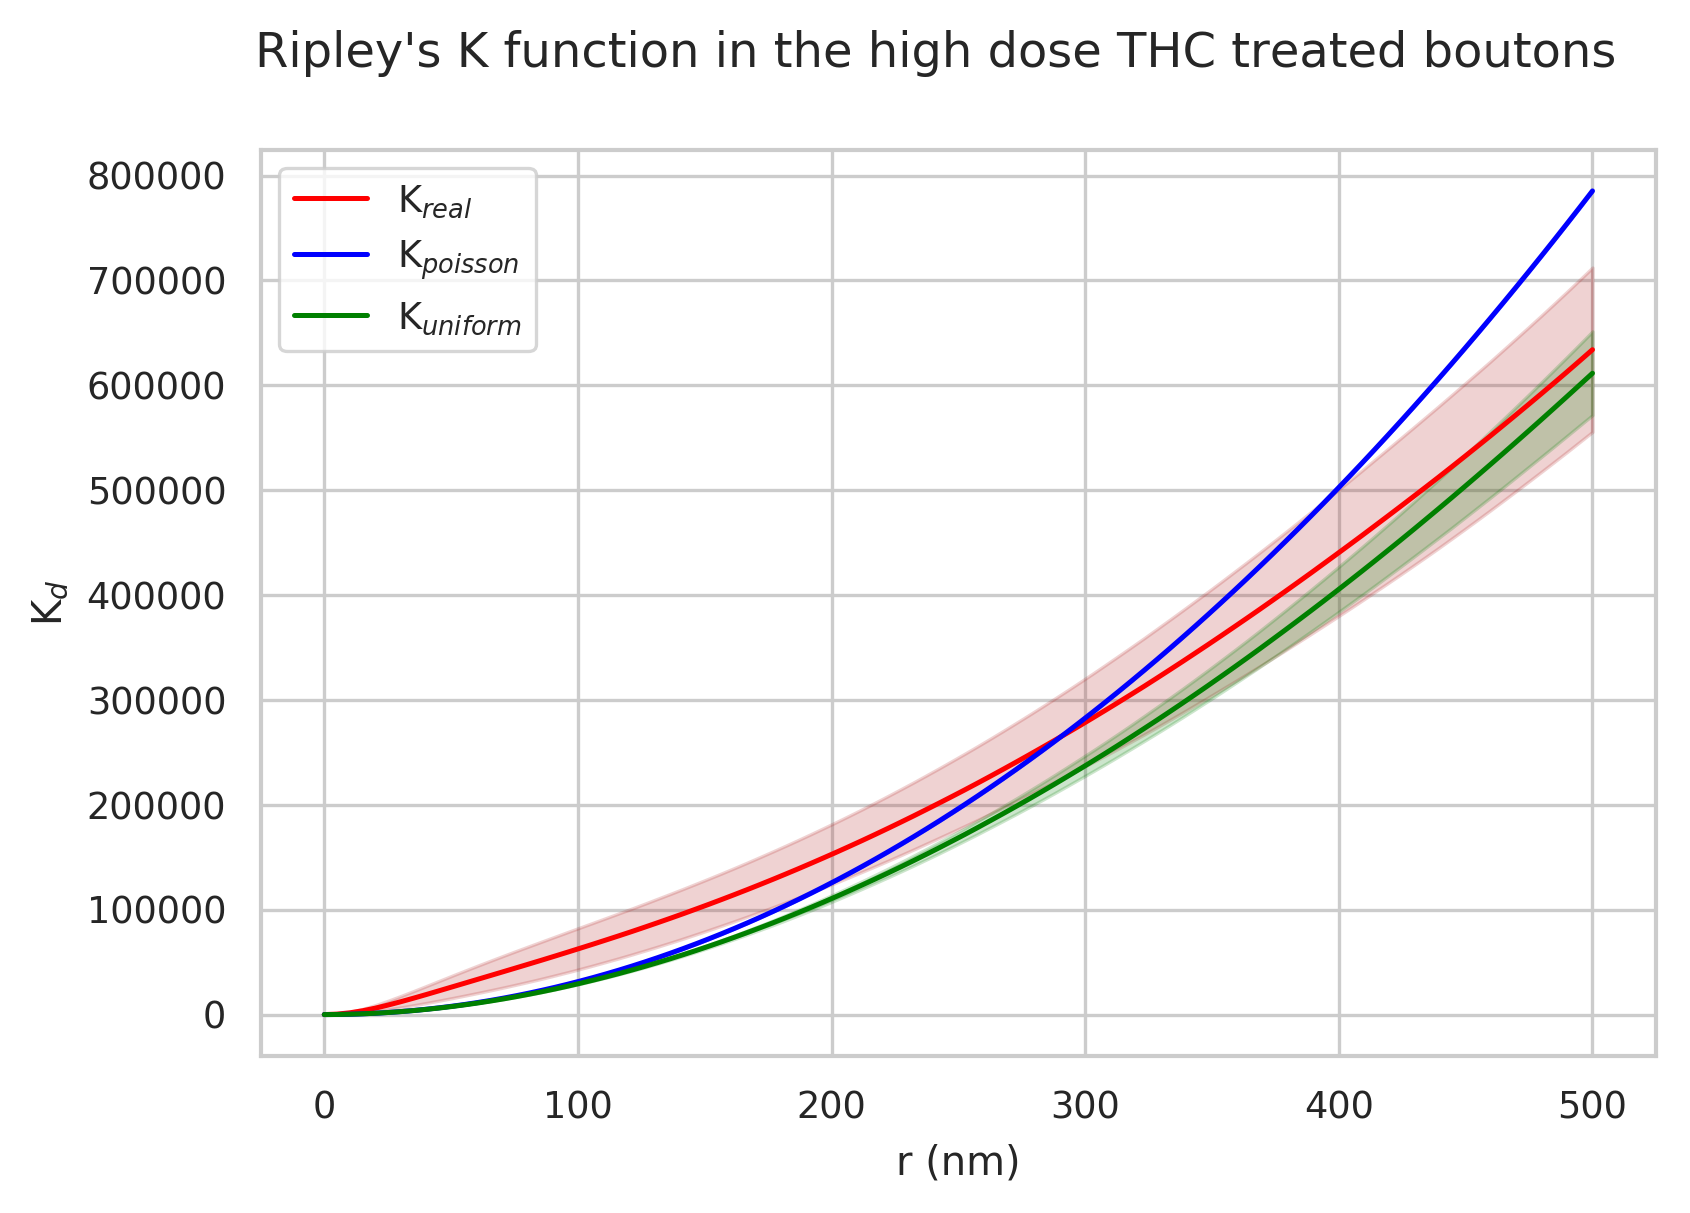

In [175]:
draw_groupRK(df_poisson=hi_poi, df_uniform=hi_uni, df_real=hi_rl)
plt.suptitle(r"Ripley's K function in the high dose THC treated boutons")

Text(0.5, 0.98, "Ripley's K function in the low dose THC treated boutons")

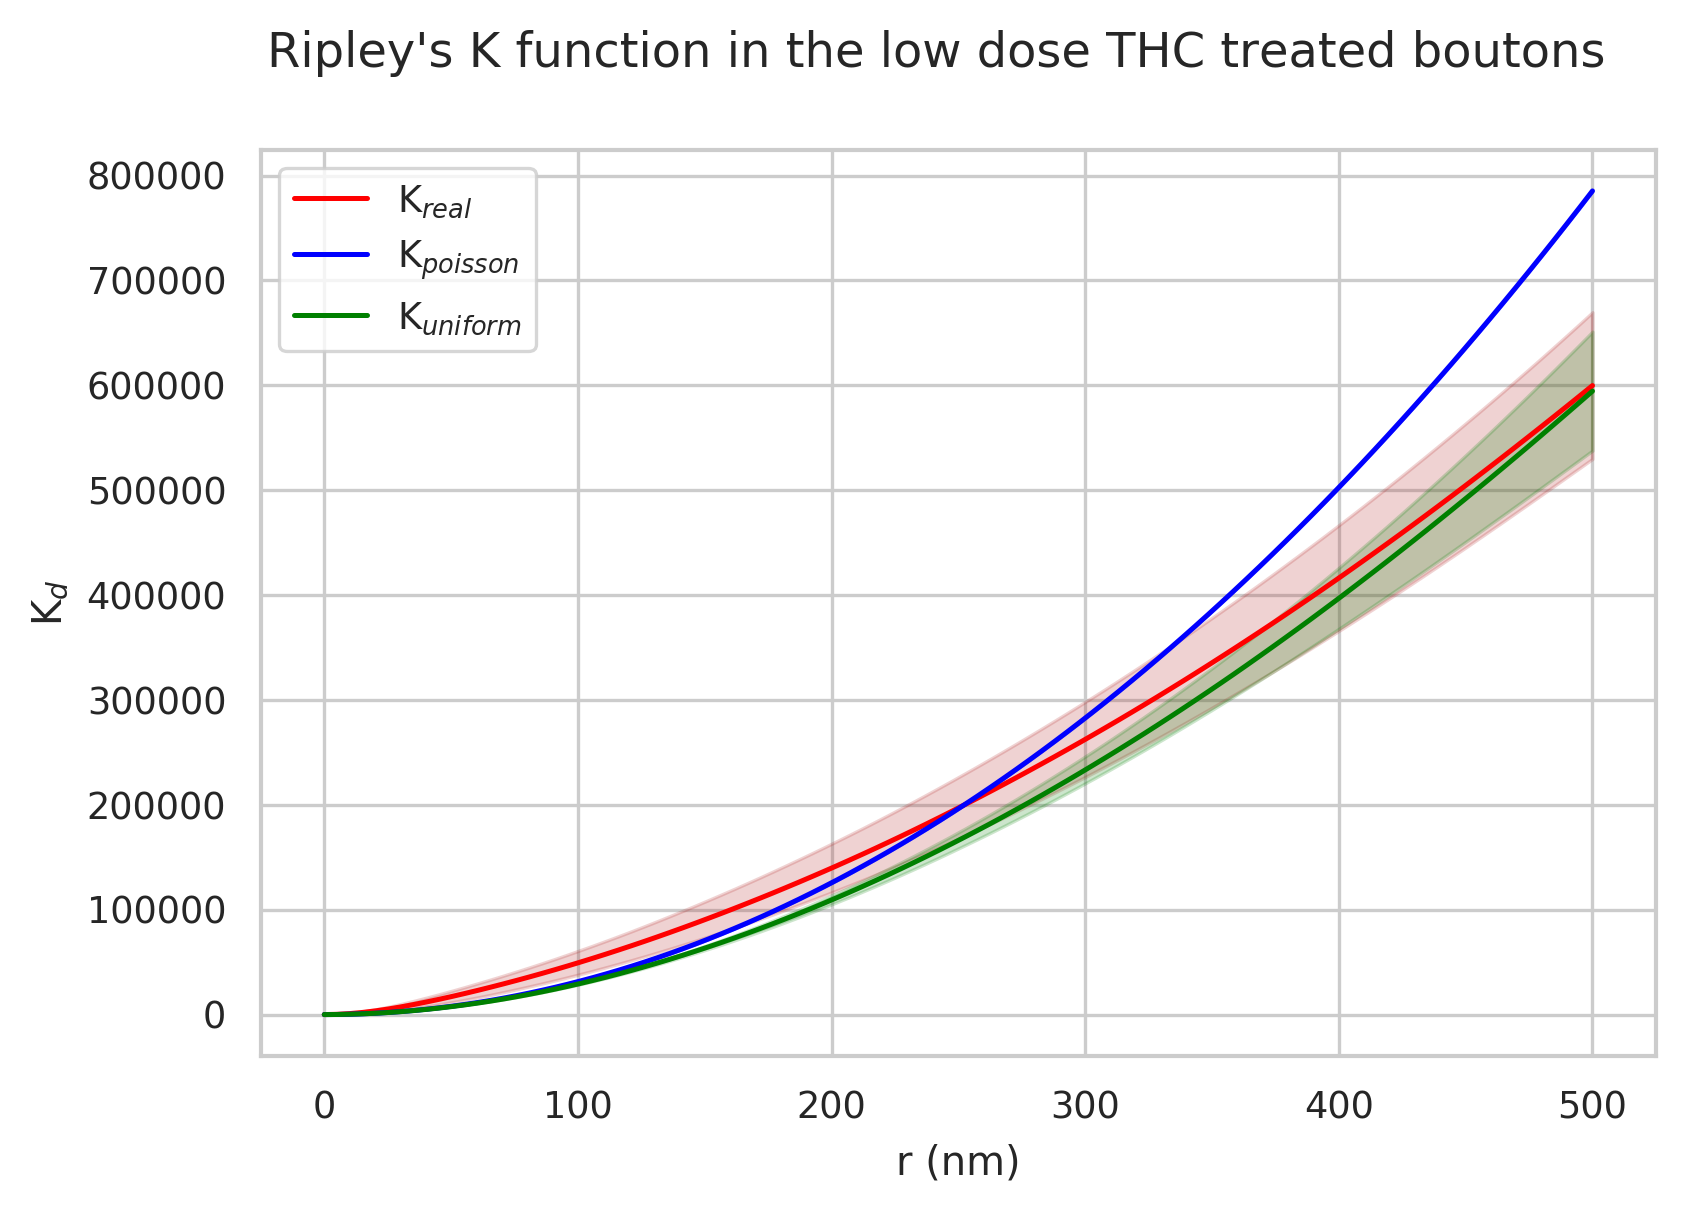

In [176]:
draw_groupRK(df_poisson=lo_poi, df_uniform=lo_uni, df_real=lo_rl)
plt.suptitle(r"Ripley's K function in the low dose THC treated boutons")

Text(0.5, 0.98, "Ripley's K function in the control group boutons")

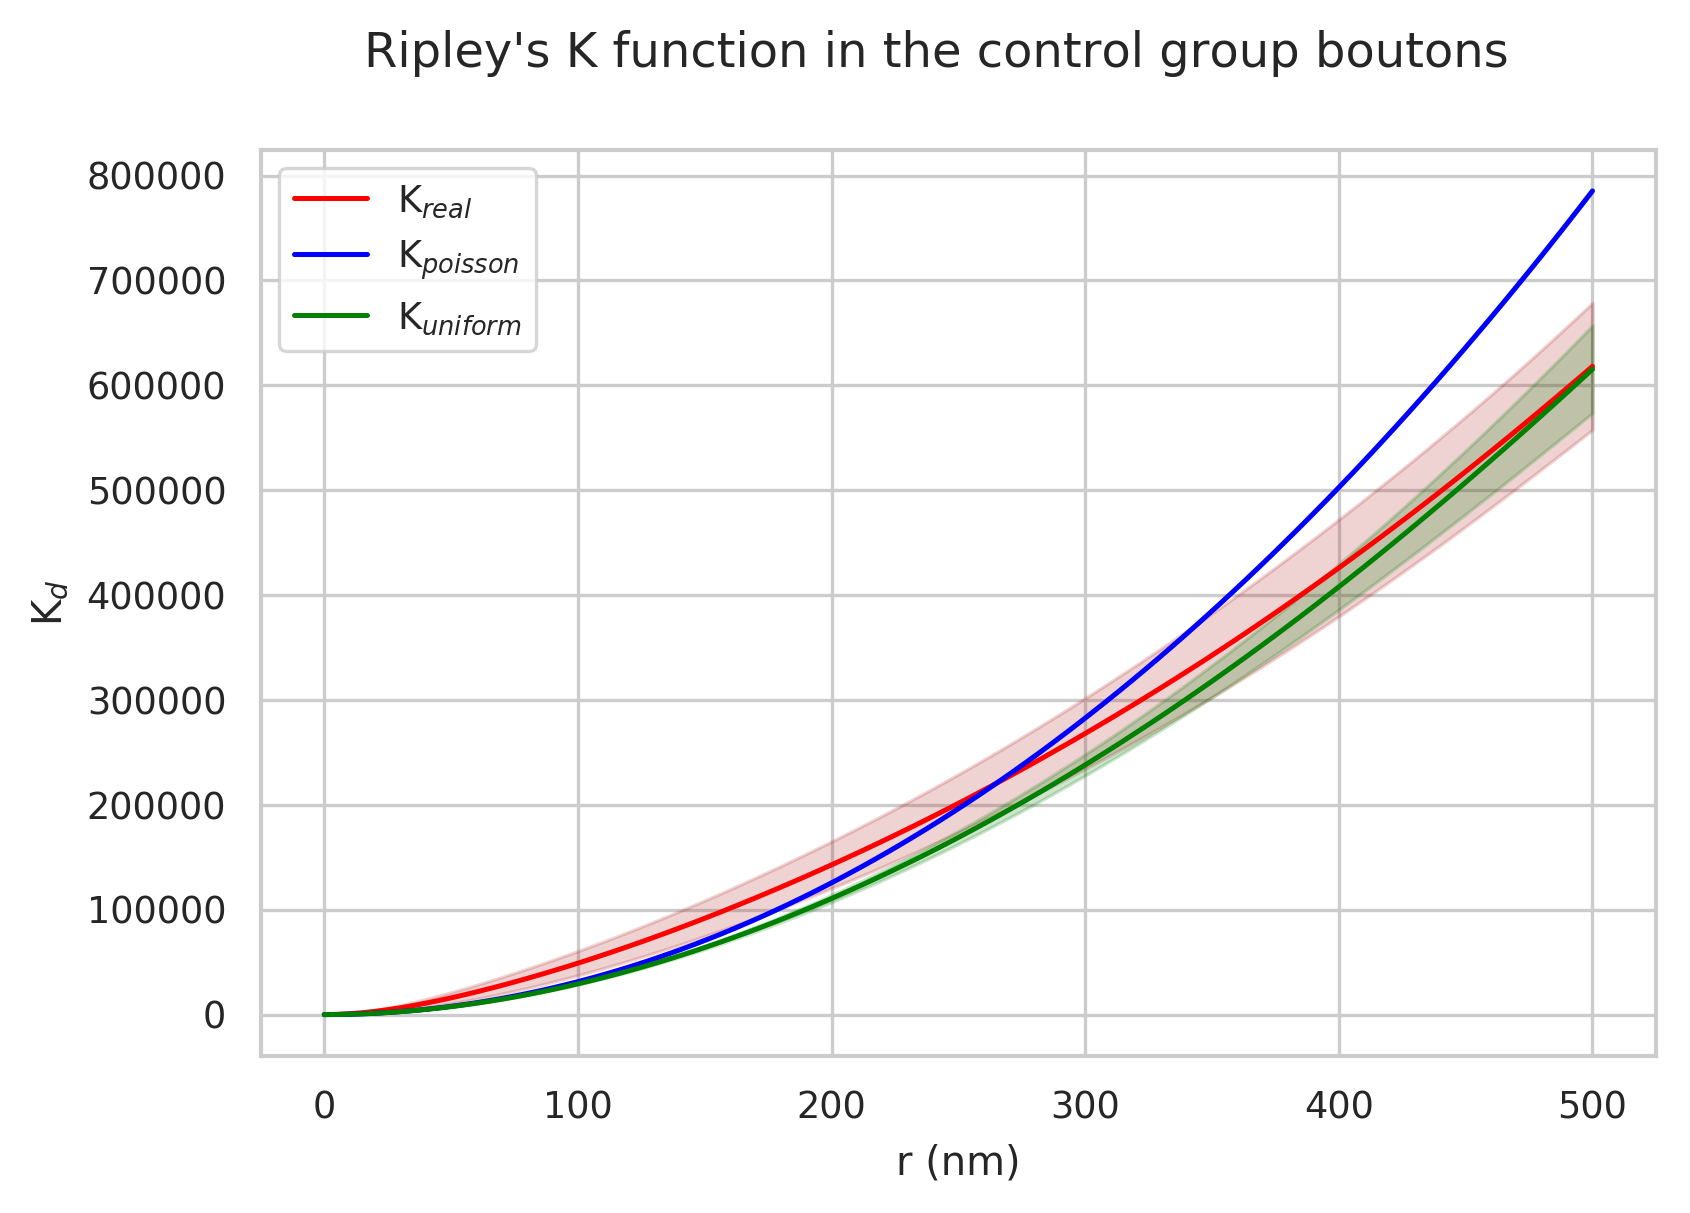

In [177]:
draw_groupRK(df_poisson=ct_poi, df_uniform=ct_uni, df_real=ct_rl)
plt.suptitle(r"Ripley's K function in the control group boutons")